b'<!DOCTYPE html>\n<html  lang="en"  prefix="og: http://ogp.me/ns#" >\n<head>\n    <meta charset="utf-8" />\n    <meta content="origin" name="referrer" />\n    <meta http-equiv="X-UA-Compatible" content="IE=edge" /><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VgcDUF5SGwYJXFFVBAg="};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<e.length;o++)r(e[o]);return r}({1:[function(t,n,e){function r(t){try{s.console&&console.log(t)}catch(n){}}var o,i=t("ee"),a=t(15),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.indexOf("dev")!==-1&&(s.dev=!0),o.indexOf("nr_dev")!==-1&&(s.nrDev=!0))}catch(c){}s.nrDev&&i.on("internal-error",function(t){r(t.stack)}),s.dev&&i.on("fn-err",function
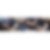

In [10]:
import requests
from bs4 import BeautifulSoup
import re
#import urllib.request

#Used headers/agent as the request timed out and asking for agent. Using following code you can fake the agent.
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}
response = requests.get("https://www.zomato.com/bangalore/top-restaurants",headers=headers)
content = response.content
print(content)
soup = BeautifulSoup(content,"html.parser")
#soup

In [11]:
top_rest = soup.find_all("div",attrs={"class": "bb0 collections-grid col-l-16"})
#print(top_rest)

list_tr = top_rest[0].find_all("div",attrs={"class": "col-s-8 col-l-1by3"})
list_rest =[]
for tr in list_tr:
    dataframe ={}
    dataframe["RestaurantName"] = (tr.find("div",attrs={"class": "res_title zblack bold nowrap"})).text.replace('\n', ' ')
    dataframe["RestaurantAddress"] = (tr.find("div",attrs={"class": "nowrap grey-text fontsize5 ttupper"})).text.replace('\n', ' ')
    dataframe["CuisineType"] = (tr.find("div",attrs={"class":"nowrap grey-text"})).text.replace('\n', ' ')
    list_rest.append(dataframe)
list_rest 

[{'CuisineType': '           European, Mediterranean, North Indian, BBQ         ',
  'RestaurantAddress': 'Marathahalli, Bangalore',
  'RestaurantName': "             AB's - Absolute Barbecues           "},
 {'CuisineType': '           Continental, Mediterranean, North Indian, Chinese, Finger Food         ',
  'RestaurantAddress': 'Koramangala 5th Block, Bangalore',
  'RestaurantName': '             Brooks and Bonds Brewery           '},
 {'CuisineType': '           Cafe, Italian, American         ',
  'RestaurantAddress': 'Indiranagar, Bangalore',
  'RestaurantName': '             Ciclo Cafe           '},
 {'CuisineType': '           Cafe         ',
  'RestaurantAddress': 'HSR, Bangalore',
  'RestaurantName': '             Zee5 Loft           '},
 {'CuisineType': '           North Indian, Continental, Chinese         ',
  'RestaurantAddress': 'Indiranagar, Bangalore',
  'RestaurantName': '             Vapour Pub & Brewery           '},
 {'CuisineType': '           Chinese, Continental

In [12]:
import pandas
df = pandas.DataFrame(list_rest)
df.to_csv("zomato_res.csv",index=False)